# Imports

In [131]:
import sys
# sys.path.insert(1,'../')

# Import python library for this notebook
import numpy as np # fundamental package for scientific computing
import matplotlib.pyplot as plt # package for plot function
import math
import torch
from PIL import Image
from matplotlib.pyplot import imshow
from IPython.html.widgets import interact, interactive, fixed
from IPython.display import display 
from tqdm.notebook import tqdm
import os
import seaborn as sns
import pandas as pd


# show figures inline
%matplotlib inline

# Extra imports
from field_stim_functions import *


# Hyperparameters

In [132]:
## This is height,width / rows,col
imSize=(512,512)

### Displaying a black square on the screen using the image size set above

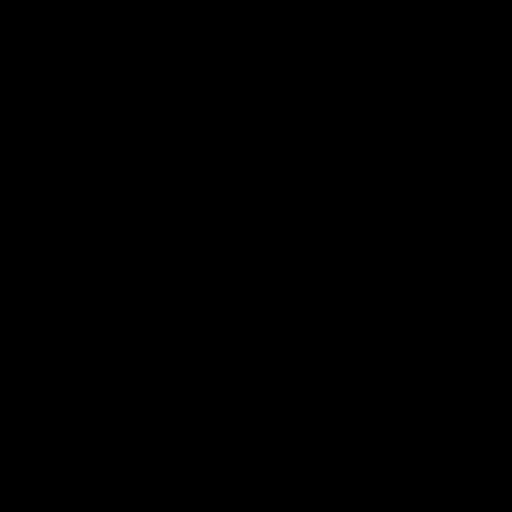

In [133]:
img_array=(np.ones((imSize[0],imSize[1]))*0).astype(np.uint8)
img_array.shape
Image.fromarray(img_array)

# Visual angle calculator from pixels, pixels/mm, distance_from_screen

In [134]:
pixels=64
approx_pixels_per_mm=10
size_of_element_mm=pixels/approx_pixels_per_mm
distance_from_sreen_mm=900

print('Visual angle in degrees is: ',2*math.degrees(math.atan(size_of_element_mm/(2*distance_from_sreen_mm))))

Visual angle in degrees is:  0.40743493739356734


In [135]:
resolution=[3024,1964]
aspect_ratio=resolution[0]/resolution[1]

size_screen_mm=[304.1,212.4] ## in mm, in inches: 11.97 x 8.36
size_screen_inches=[11.97,8.36]

# 1) Gabors

## Computation (Gabor2d()) -> Place (Gabor2d()) -> Scale/Col (showGabor()) -> Viz. (display/imshow)

In [51]:
gabor, gauss, sinusoidal = Gabor2D(lambda_=8, theta=0, phase=-90, stdev=5, imSize=(60,60), elCentre=None, gratingContrast=1.0)

In [52]:
print(gabor.shape)
print(gauss.shape)
print(sinusoidal.shape)

torch.Size([60, 60])
torch.Size([60, 60])
torch.Size([60, 60])


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

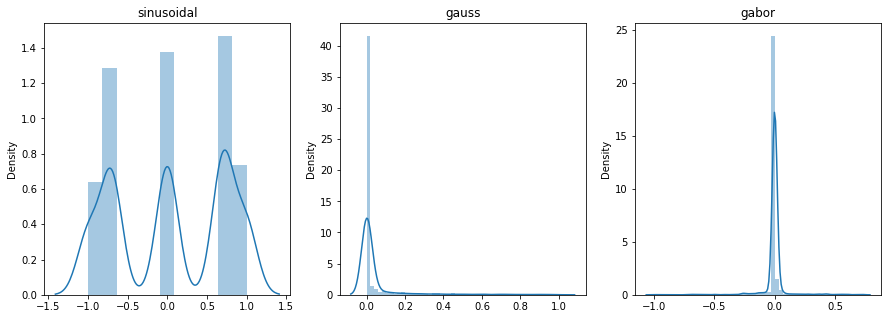

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(sinusoidal)
plt.title('sinusoidal')
# plt.show()

plt.subplot(1,3,2)
sns.distplot(gauss)
plt.title('gauss')
# plt.show()

plt.subplot(1,3,3)
sns.distplot(gabor)
plt.title('gabor')
plt.show()

In [54]:
print(sinusoidal.min(), sinusoidal.max())
print(gauss.min(), gauss.max())
print(gabor.min(), gabor.max())

tensor(-1.) tensor(1.)
tensor(2.3195e-16) tensor(1.)
tensor(-1.) tensor(0.7261)


In [55]:
print(sinusoidal[0,0])
print(gauss[0,0])

print(gabor[0,0])
print(sinusoidal[0,0] * gauss[0,0])

tensor(0.7071)
tensor(2.4566e-15)
tensor(1.7371e-15)
tensor(1.7371e-15)


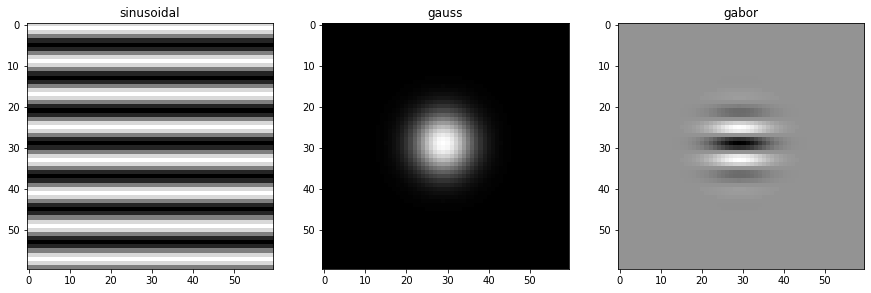

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
imshow(show_gabor(sinusoidal),cmap=plt.gray())
plt.title('sinusoidal')
# plt.show()

plt.subplot(1,3,2)
imshow(show_gabor(gauss),cmap=plt.gray())
plt.title('gauss')
# plt.show()

plt.subplot(1,3,3)
imshow(show_gabor(gabor),cmap=plt.gray())
plt.title('gabor')
plt.show()

#### Scaling function bounds the image

In [57]:
im=imscale(gabor,-1,1)
print(im)
print(im.min(),im.max())

tensor([[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        ...,
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]])
tensor(0.) tensor(0.8631)


In [58]:
im = np.array(im*255).astype(np.uint8)
im

array([[127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127]], dtype=uint8)

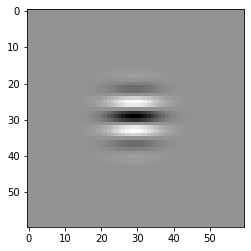

In [59]:
im=Image.fromarray(im)
imshow(im)

### Interactive explorer for Gabors

In [60]:
def demo_gabor(lambda_, theta, phase, stdev, imSize,gratingContrast):
    elCentre=None
    
    gabor, gauss, sinusoidal = Gabor2D(lambda_=lambda_, theta=theta, phase=phase, stdev=stdev, imSize=imSize, elCentre=elCentre, gratingContrast=gratingContrast) 
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    imshow(show_gabor(sinusoidal),cmap=plt.gray())
    plt.title('sinusoidal')
    # plt.show()

    plt.subplot(1,3,2)
    imshow(show_gabor(gauss),cmap=plt.gray())
    plt.title('gauss')
    # plt.show()

    plt.subplot(1,3,3)
    imshow(show_gabor(gabor),cmap=plt.gray())
    plt.title('gabor')
    plt.show()

# interact(demo_gabor,lambda_=(0,16,1), theta=(0,360,30), phase=(-90,90,30), stdev=(1,10,1), imSize=(20,100,20),gratingContrast=(0,1,0.1))
interact(demo_gabor,lambda_=(0,100,1), theta=(0,360,30), phase=(-90,90,30), stdev=(1,10,1), imSize=(20,100,20),gratingContrast=(0,1,0.1))

interactive(children=(IntSlider(value=50, description='lambda_'), IntSlider(value=180, description='theta', ma…

<function __main__.demo_gabor(lambda_, theta, phase, stdev, imSize, gratingContrast)>

In [103]:
def demo_sinusoidal(lambda_, theta, phase, stdev, imSize,gratingContrast):
    elCentre=None
    
    gabor, gauss, sinusoidal = Gabor2D(lambda_=lambda_, theta=theta, phase=phase, stdev=stdev, imSize=imSize, elCentre=elCentre, gratingContrast=gratingContrast) 
    

    display(show_gabor(sinusoidal))

    # plt.show()


# interact(demo_gabor,lambda_=(0,16,1), theta=(0,360,30), phase=(-90,90,30), stdev=(1,10,1), imSize=(20,100,20),gratingContrast=(0,1,0.1))
interact(demo_sinusoidal,lambda_=(0,100,1), theta=(0,360,15), phase=(-90,90,30), stdev=(1,10,1), imSize=(20,600,20),gratingContrast=(0,1,0.1))

interactive(children=(IntSlider(value=50, description='lambda_'), IntSlider(value=180, description='theta', ma…

<function __main__.demo_sinusoidal(lambda_, theta, phase, stdev, imSize, gratingContrast)>

### Making different phases and visualizing - This is useful to start making the phase randomization dataset

#### gabors with the same phases

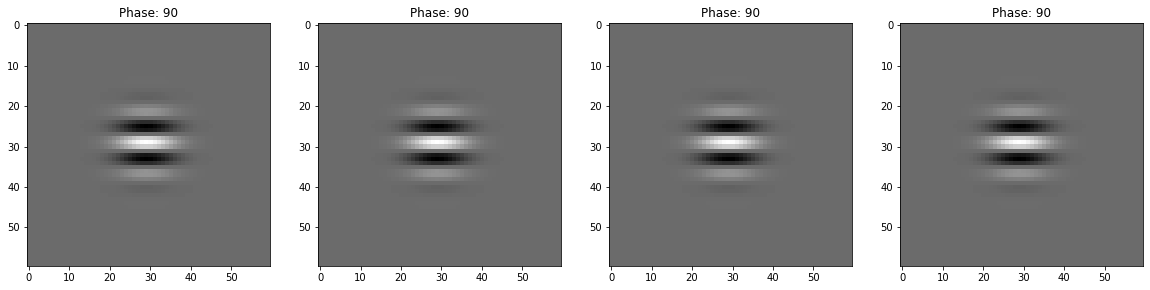

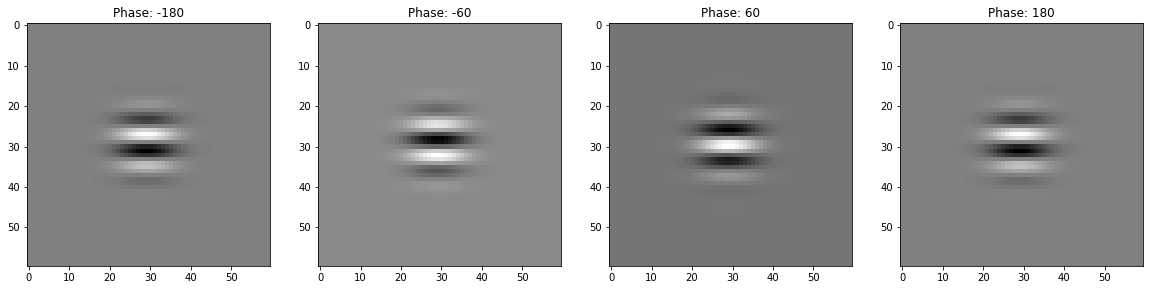

In [18]:
visualize_phase_list=[90,90,90,90]
visualize_gabors=[]
visualize_sinusoidal=[]
for phase in visualize_phase_list:
    gabor, gauss, sinusoidal = Gabor2D(lambda_=8, theta=0, phase=phase, stdev=5, imSize=60, elCentre=None, gratingContrast=1.0)
    visualize_gabors.append(gabor)
    visualize_sinusoidal.append(sinusoidal)


plt.figure(figsize=(20,16))
for i in range(len(visualize_gabors)):
    plt.subplot(1,len(visualize_phase_list),i+1)
    imshow(show_gabor(visualize_gabors[i]),cmap=plt.gray())
    plt.title('Phase: '+ str(visualize_phase_list[i]))

visualize_phase_list=[-180,-60,60,180]


visualize_gabors=[]
visualize_sinusoidal=[]
for phase in visualize_phase_list:
    gabor, gauss, sinusoidal = Gabor2D(lambda_=8, theta=0, phase=phase, stdev=5, imSize=60, elCentre=None, gratingContrast=1.0)
    visualize_gabors.append(gabor)
    visualize_sinusoidal.append(sinusoidal)

plt.figure(figsize=(20,16))
for i in range(len(visualize_gabors)):
    plt.subplot(1,len(visualize_phase_list),i+1)
    imshow(show_gabor(visualize_gabors[i]),cmap=plt.gray())
    plt.title('Phase: '+ str(visualize_phase_list[i]))

# Probing variants

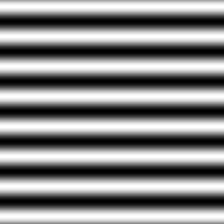

In [129]:
gabor, gauss, sinusoidal = Gabor2D(lambda_=30, theta=0, phase=-90, stdev=6, imSize=(224,224), elCentre=None, gratingContrast=1.0)
show_gabor(sinusoidal)

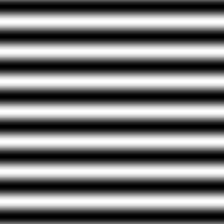

In [130]:
gabor, gauss, sinusoidal = Gabor2D(lambda_=30, theta=180, phase=90, stdev=6, imSize=(224,224), elCentre=None, gratingContrast=1.0)
show_gabor(sinusoidal)

# Making the full sinusoidal dataset

In [95]:
orientation_list=np.arange(0,181)
frequency_list=np.arange(3,100,5)
# phase_list=np.arange(0,90,5)
phase_list=np.array([-90,90])


total_num_images=0
for theta in orientation_list:
    for phase in phase_list:
        for freq in frequency_list:
            total_num_images+=1

In [96]:
total_num_images

7240

In [97]:
def make_folders(path):
    if(not os.path.exists(path)):
        os.makedirs(path)
        
    return path


def append_values_dict(original_dict,append_dict):
    for key in append_dict.keys():
        original_dict[key].append(append_dict[key])
    return original_dict

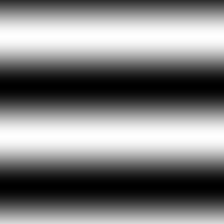

In [98]:
gabor, gauss, sinusoidal = Gabor2D(lambda_=100, theta=0, phase=0, stdev=6, imSize=(224,224), elCentre=None, gratingContrast=1.0)
show_gabor(sinusoidal)

In [100]:
# !rm -rf /home/jovyan/work/Datasets/border_ownership/sinusoidal

In [101]:
experiment_root_dir='/home/jovyan/work/Datasets/border_ownership/sinusoidal/'

_=make_folders(experiment_root_dir)
folder_img=make_folders(os.path.join(experiment_root_dir,'img'))
csv_data={'img_path':[],'orientation':[], 'freq':[], 'phase':[],'id_num':[]}

In [102]:
id_num=0
for orientation in tqdm(orientation_list):
    for freq in frequency_list:
        for phase in phase_list:
            gabor, gauss, sinusoidal = Gabor2D(lambda_=freq, theta=orientation, phase=phase, stdev=6, imSize=(224,224), elCentre=None, gratingContrast=1.0)
            
            
            img_id=str(id_num).zfill(len(str(total_num_images)))
            img_name='img_orientation_' + str(orientation).zfill(len(str(max(orientation_list)))) + '_freq_' + str(freq).zfill(len(str(max(frequency_list)))) + '_phase_' + str(phase).zfill(len(str(max(phase_list)))) + '.png'
            img_path=os.path.join(folder_img,img_name)
            csv_data=append_values_dict(csv_data,{'img_path':img_path, 'orientation':orientation,'freq':freq, 'phase':phase,'id_num':img_id})
            
            
            show_gabor(sinusoidal).save(img_path)
            
            
            id_num+=1
            
pd.DataFrame(csv_data).to_csv(os.path.join(experiment_root_dir,'img_data.csv'),index=False)
            

  0%|          | 0/181 [00:00<?, ?it/s]